In [1]:
import pandas as pd
import numpy as np

# 1.创建DataFrame
题目：将下面的字典创建为DataFrame
  * 注意传递的字典类型，必须有[]

In [2]:
# 字典类型1
data={"grammer":["Python","C","Java","Go","R","SQL","PHP","Python"],
     "score":[1,2,np.nan,4,5,6,7,10]}
# 字典类型2
# data={"grammer":"Python",
#      "score":[1,2]}
# 字典类型3
# data={"grammer":"Python"} #ValueError:如果使用所有标量值，则必须传递索引
df=pd.DataFrame(data)

# 2.数据提取
提取含有字符串“Python”的行

In [3]:
# 列的提取方式有两种
# df['grammer']
df.grammer

# .str方法适应于Series
df['grammer'].str #StringMethods

#.str方法可以使用字符串的相关属性和方法
df['grammer'].str.contains('Python') #NaN的bool类型仍为NaN

#bool Series在DataFrame中起关键作用，配合df使用索引数量须一致
df[df['grammer'].str.contains('Python')]

,grammer,score
0,Python,1.0
7,Python,10.0


* 若grammer列存在缺失值

In [4]:
data={"grammer":["Python","C","Java","Go",np.nan,"SQL","PHP","Python"],
     "score":[1,2,np.nan,4,5,6,7,10]}
df2=pd.DataFrame(data)
df2

,grammer,score
0,Python,1.0
1,C,2.0
2,Java,NaN
3,Go,4.0
4,NaN,5.0
5,SQL,6.0
6,PHP,7.0
7,Python,10.0


In [5]:
len(df2) #8

len(df2['grammer'].dropna().str.contains('Python')) #7
df2['grammer'].dropna().str.contains('Python') #只能得到bool类型
# df2[df2['grammer'].dropna().str.contains('Python')] #出错，不能获取含“Python”的列

0     True
1    False
2    False
3    False
5    False
6    False
7     True
Name: grammer, dtype: bool

In [6]:
df2['grammer'].isnull()
~df2['grammer'].isnull()#取反
df2[~df2['grammer'].isnull()] #选取不是空值的行，两种方法任选其一
df2[df2['grammer'].notnull()]

,grammer,score
0,Python,1.0
1,C,2.0
2,Java,NaN
3,Go,4.0
5,SQL,6.0
6,PHP,7.0
7,Python,10.0


In [7]:
df2=df2[~df2['grammer'].isnull()]
result=df2[df2['grammer'].str.contains('Python')]
result

,grammer,score
0,Python,1.0
7,Python,10.0


# 3.提取列名
输出df的所有列名

In [8]:
df.columns

Index(['grammer', 'score'], dtype='object')

In [9]:
# 同理可得索引
df.index

RangeIndex(start=0, stop=8, step=1)

# 4.修改列名
修改第二列列名为“popularity”

In [10]:
# 方法1
df.rename(columns={'score':'popularity'},inplace=True)
# 只有使用inplace=True才能把改变反应到原数据
# df.rename()

#方法2
# df=df.rename(columns={'score':'popularity'})
#重新赋值，但易出错

In [11]:
df

,grammer,popularity
0,Python,1.0
1,C,2.0
2,Java,NaN
3,Go,4.0
4,R,5.0
5,SQL,6.0
6,PHP,7.0
7,Python,10.0


# 5.字符统计
统计grammer列中每种编程语言出现的次数

In [12]:
#统计唯一值
df['grammer'].unique()

# 统计每个值出现次数
df['grammer'].value_counts()

Python    2
PHP       1
SQL       1
Go        1
R         1
C         1
Java      1
Name: grammer, dtype: int64

# 6.缺失值处理
将空值用上下值的平均值填充

In [13]:
#值直接填充
df.fillna(999)
#使用方法填充
df.fillna(method="bfill")#ffill用上值填充,bfill用下值填充

df['popularity'].fillna(df['popularity'].interpolate())#用平均值填充，线性方法

0     1.0
1     2.0
2     3.0
3     4.0
4     5.0
5     6.0
6     7.0
7    10.0
Name: popularity, dtype: float64

# 7.数据提取
提取popularity列中值大于3的行

In [14]:
#NaN值参与任何比较都是False
df['popularity']>3

df[df['popularity']>3]

,grammer,popularity
3,Go,4.0
4,R,5.0
5,SQL,6.0
6,PHP,7.0
7,Python,10.0


# 8.数据去重
按照grammer列进行去重

In [15]:
#查看重复值
# df['grammer'].duplicated(keep='first') #保留第一个,后面的重复值显示True
df['grammer'].duplicated(keep='last') #保留最后一个,前面的重复值显示True
# df['grammer'].duplicated(keep=False) #都不保留，都显示True

#删除重复值
df['grammer'].drop_duplicates() #删除最后一个

#方法2
df.drop_duplicates(['grammer']) #打印完整表格

,grammer,popularity
0,Python,1.0
1,C,2.0
2,Java,NaN
3,Go,4.0
4,R,5.0
5,SQL,6.0
6,PHP,7.0


# 9.数据计算
计算popularity列平均值

In [16]:
df.mean() #对所有列分别求平均值 sum(),min(),max()

df['popularity'].mean()

5.0

# 10.格式转换
将grammer列转换为list

In [17]:
# to_list()和tolist,Series都能用，ndarray只能用tolist()
# df['grammer'].to_list()
df['grammer'].tolist()

temp=np.arange(10)
temp.tolist()
# temp.to_list() #AttributeError: 'numpy.ndarray' 对象没有属性'to_list'

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# 11.数据保存
将DataFrame保存为ECXCEL

In [18]:
df.to_excel('./Pandas题.xlsx')

# 12.数据查看
查看数据行列数

In [19]:
df.shape

(8, 2)

# 13.数据提取
提取popularity列值大于3小于7的行

In [20]:
#只能用逻辑符号(&,|)，不能用逻辑关键词(and,or)
# (df['popularity']>3)and(df['popularity']<7)
(df['popularity']>3)&(df['popularity']<7)
df[(df['popularity']>3)&(df['popularity']<7)]

,grammer,popularity
3,Go,4.0
4,R,5.0
5,SQL,6.0


# 14.位置处理
交换两列位置

In [21]:
# 方法1
# 1.保存数据
temp=df['popularity']
# 2.删除某列（传入的是个子集）
df.drop(labels=['popularity'],axis=1,inplace=True)
# 1.插入某列
df.insert(0,'popularity',temp)

In [22]:
# 方法2,更优，可随意转回
df.columns #Index(['popularity', 'grammer'], dtype='object')
cols=df.columns[[1,0]] #Index(['grammer', 'popularity'], dtype='object')
# 注意两个括号
cols
df=df[cols]

# 同理不可用于index
# df.index #RangeIndex(start=0, stop=8, step=1)
# df[df.index[[6,3,2,5,4,7,1,0]]] #不能进行行转换

In [23]:
df

,grammer,popularity
0,Python,1.0
1,C,2.0
2,Java,NaN
3,Go,4.0
4,R,5.0
5,SQL,6.0
6,PHP,7.0
7,Python,10.0


# 15.数据提取
提取popularity列最大值所在行

In [24]:
# df['popularity'].max()
df['popularity']==df['popularity'].max()
df[df['popularity']==df['popularity'].max()]

,grammer,popularity
7,Python,10.0


# 16.数据查看
查看最后5行数据

In [25]:
df.tail(3) #可自定义查看后n行数据

df.iloc[::-1][:5] #::为间隔步数，-1表示倒数，5表示5个

,grammer,popularity
7,Python,10.0
6,PHP,7.0
5,SQL,6.0
4,R,5.0
3,Go,4.0


# 17.数据修改
添加一行数据['Perl',6.6]

In [26]:
# 方法1，直接添加
# df.loc[55,:]=['Perl',6.6] #索引为55
# df.loc[:,555]=[2,3,4,5,6,7,8,9,10] #选择所有的行，添加列名为555的列,传入相应数据

# 方法2，append方法，要求字典类型
# row={'grammer':'C++','popularity':7.7}
# df=df.append(row,ignore_index=True) #TypeError:仅当ignore_index=True或系列具有名称时，才可以追加Series
# 只能添加列，且索引自动追加

# 方法3，concat方法，要求DF类型，无索引
row={'grammer':'HTML','popularity':[8.8]}
# pd.concat((df,row)) #TypeError: 无法连接类型为'<class 'dict'>'的对象; 仅Series and DataFrame objs 有效
df=pd.concat((df,pd.DataFrame(row)),axis=0,ignore_index=False)

In [27]:
df

,grammer,popularity
0,Python,1.0
1,C,2.0
2,Java,NaN
3,Go,4.0
4,R,5.0
5,SQL,6.0
6,PHP,7.0
7,Python,10.0
0,HTML,8.8


# 18.数据修改
删除最后一行数据

In [29]:
df.drop(labels=7) #删除索引为8的行
df.iloc[-1] #选择倒数第一行
df.iloc[-1].name #索引名
df.drop(labels=df.iloc[-1].name,inplace=True)

In [30]:
df

,grammer,popularity
1,C,2.0
2,Java,NaN
3,Go,4.0
4,R,5.0
5,SQL,6.0
6,PHP,7.0
7,Python,10.0


# 19.数据整理
对数据按照'popularity'列值的大小进行排序

In [31]:
df['popularity'].sort_values(ascending=False) #降序,默认升序，NaN在最后
# df.sort_index(ascending=False)
# df.sort_values("popularity",inplace=True,ascending=False)

7    10.0
6     7.0
5     6.0
4     5.0
3     4.0
1     2.0
2     NaN
Name: popularity, dtype: float64

In [32]:
df

,grammer,popularity
1,C,2.0
2,Java,NaN
3,Go,4.0
4,R,5.0
5,SQL,6.0
6,PHP,7.0
7,Python,10.0


# 20.字符统计
统计grammer列每个字符串的长度

In [34]:
# 方法1
# df['grammer'].map(lambda x:len(x)) #针对某一个列
df['grammer'].apply(lambda x:len(x)) #针对整个数组
df.apply(lambda x:x.max()) #获取最大值，字符串按字母顺序排列，而不是长度

# 方法2
# df['grammer'].str.len()

# df['popularity'][2] #float类型长度为nan
# len(df['popularity'][2]) #TypeError: object of type 'numpy.float64' has no len()

# 若原数据中有缺失值
# df2=df[~df['grammer'].isnull()]
# df2['grammer'].map(lambda x:len(x))

grammer       SQL
popularity     10
dtype: object

# pandas数据处理

# 21.数据读取
读取本地EXCEL数据

In [260]:
# 1.相对路径
df=pd.read_excel('./21-50数据.xlsx')

# 2.绝对路径（r可以防止‘\'的逃逸）
# 2.1方式1
# pd.read_excel('D:/研究生/比赛/系统更新二分类/Untitled Folder/21-50数据.xlsx')
# 2.2方式2
pd.read_excel(r'D:\研究生\比赛\系统更新二分类\Untitled Folder/21-50数据.xlsx')
# df


,createTime,education,salary
0,2020-03-16 11:30:18,本科,20k-35k
1,2020-03-16 10:58:48,本科,20k-40k
2,2020-03-16 10:46:39,不限,20k-35k
3,2020-03-16 10:45:44,本科,13k-20k
4,2020-03-16 10:20:41,本科,10k-20k
...,...,...,...
130,2020-03-16 11:36:07,本科,10k-18k
131,2020-03-16 09:54:47,硕士,25k-50k
132,2020-03-16 10:48:32,本科,20k-40k
133,2020-03-16 10:46:31,本科,15k-23k


# 22.查看df数据前5行
查看df数据前5行

In [105]:
df.head()

,createTime,education,salary
0,2020-03-16 11:30:18,本科,20k-35k
1,2020-03-16 10:58:48,本科,20k-40k
2,2020-03-16 10:46:39,不限,20k-35k
3,2020-03-16 10:45:44,本科,13k-20k
4,2020-03-16 10:20:41,本科,10k-20k


# 23.数据计算
将salary列数据转换为最大值与最小值的平均值

In [40]:
import re

In [53]:
df.iloc[0] #第0行
df.iloc[0,2] #第0行第2列

# 正则表达式
list_temp=re.findall(r'\d+\.?\d*',df.iloc[0,2]) #第一个参数是模式，第二个是要匹配的内容
list_temp #20,35
# type(list_temp[0])
# str中'+'表示连接，'*'表示重复
# int中'+*/'才是计算

# list_temp[0]+list_temp[1] #2035
# float(list_temp[0]) #20.0
(float(list_temp[0])+float(list_temp[1]))/2

27.5

In [76]:
df.head(3)

,createTime,education,salary
0,2020-03-16 11:30:18,本科,27500
1,2020-03-16 10:58:48,本科,20k-40k
2,2020-03-16 10:46:39,不限,20k-35k


In [69]:
df.iloc[-3] #可以是负数，表示倒数第3行
df.loc[2] #索引名为2,不能为负数

df.iloc[2,2] #第3行第4列
df.loc[2,'salary'] #第3行名为salary的列


'20k-35k'

In [261]:
for i in range(0,len(df['salary'])):
    print('says:',type(df.iloc[i,2]))
    list_temp=re.findall(r'\d+\.?\d*',df.iloc[i,2])
    df.iloc[i,2]=((float(list_temp[0])+float(list_temp[1]))/2)*1000
    print('says:',type(df.iloc[i,2]))
df

says: <class 'str'>
says: <class 'float'>
says: <class 'str'>
says: <class 'float'>
says: <class 'str'>
says: <class 'float'>
says: <class 'str'>
says: <class 'float'>
says: <class 'str'>
says: <class 'float'>
says: <class 'str'>
says: <class 'float'>
says: <class 'str'>
says: <class 'float'>
says: <class 'str'>
says: <class 'float'>
says: <class 'str'>
says: <class 'float'>
says: <class 'str'>
says: <class 'float'>
says: <class 'str'>
says: <class 'float'>
says: <class 'str'>
says: <class 'float'>
says: <class 'str'>
says: <class 'float'>
says: <class 'str'>
says: <class 'float'>
says: <class 'str'>
says: <class 'float'>
says: <class 'str'>
says: <class 'float'>
says: <class 'str'>
says: <class 'float'>
says: <class 'str'>
says: <class 'float'>
says: <class 'str'>
says: <class 'float'>
says: <class 'str'>
says: <class 'float'>
says: <class 'str'>
says: <class 'float'>
says: <class 'str'>
says: <class 'float'>
says: <class 'str'>
says: <class 'float'>
says: <class 'str'>
says: <class '

,createTime,education,salary
0,2020-03-16 11:30:18,本科,27500
1,2020-03-16 10:58:48,本科,30000
2,2020-03-16 10:46:39,不限,27500
3,2020-03-16 10:45:44,本科,16500
4,2020-03-16 10:20:41,本科,15000
...,...,...,...
130,2020-03-16 11:36:07,本科,14000
131,2020-03-16 09:54:47,硕士,37500
132,2020-03-16 10:48:32,本科,30000
133,2020-03-16 10:46:31,本科,19000


# 24.数据分组
将数据根据学历进行分组并计算平均薪资

In [264]:
# df.groupby('education')
df['salary']=df['salary'].astype(float)
# df.groupby('education').mean()
df.groupby('education').mean().reset_index() #加入索引

# 扩展
df.groupby('education').agg(['mean','max','min'])

salary                  
                   mean      max      min
education                                
不限         19600.000000  30000.0   3500.0
大专         10000.000000  15000.0   5000.0
本科         19361.344538  45000.0   3500.0
硕士         20642.857143  37500.0  12500.0

# 25.时间转换
将create Time列时间转换为月-日

In [119]:
from datetime import datetime

In [134]:
datetime.now()
df

,createTime,education,salary
0,2020-03-16 11:30:18,本科,27500.0
1,2020-03-16 10:58:48,本科,30000.0
2,2020-03-16 10:46:39,不限,27500.0
3,2020-03-16 10:45:44,本科,16500.0
4,2020-03-16 10:20:41,本科,15000.0
...,...,...,...
130,2020-03-16 11:36:07,本科,14000.0
131,2020-03-16 09:54:47,硕士,37500.0
132,2020-03-16 10:48:32,本科,30000.0
133,2020-03-16 10:46:31,本科,19000.0


In [156]:
df['createTime'].iloc[0] #Timestamp('2020-03-16 11:30:18')

# 方法1
# str(df['createTime'].iloc[0]) #强制转换为字符串类型'2020-03-16 11:30:18'
# str(df['createTime'].iloc[0])[5:10] #切片得到第索引为5到9的字符'03-16'，只能对str类型使用
# str(df['createTime'].iloc[0])[:7] #得到前7个字符

# 方法2
# df['createTime'].iloc[0].strftime('%Y-%m-%d') #时间转字符串类型'2020-03-16'
df['createTime'].iloc[0].to_pydatetime() #datetime.datetime(2020, 3, 16, 11, 30, 18)
pd.to_datetime(df['createTime'].iloc[3],format='%Y-%m-%d') #Timestamp('2020-03-16 10:45:44')
# datetime.strptime('2020-04-06','%Y-%m-%d') #字符串转时间类型datetime.datetime(2020, 4, 6, 0, 0)

Timestamp('2020-03-16 10:45:44')

In [262]:
for i in range(0,len(df)):
    df.iloc[i,0]=str(df['createTime'].iloc[i])[5:10]
df

,createTime,education,salary
0,03-16,本科,27500
1,03-16,本科,30000
2,03-16,不限,27500
3,03-16,本科,16500
4,03-16,本科,15000
...,...,...,...
130,03-16,本科,14000
131,03-16,硕士,37500
132,03-16,本科,30000
133,03-16,本科,19000


# 26.数据查看
查看索引、数据类型和内存信息

In [265]:
df.info() #索引、数据类型和内存信息
df.shape #查看数据行列数
df.dtypes #查看每列的数据类型

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   createTime  135 non-null    object 
 1   education   135 non-null    object 
 2   salary      135 non-null    float64
dtypes: float64(1), object(2)
memory usage: 3.3+ KB


createTime     object
education      object
salary        float64
dtype: object

# 27.数据查看
查看数值型列的汇总统计

In [162]:
df.describe() #可计算数值信息

,salary
count,135.000000
mean,19159.259259
std,8661.686922
min,3500.000000
25%,14000.000000
50%,17500.000000
75%,25000.000000
max,45000.000000


# 28.数据整理
新增一列根据salary将数据分为三组

In [236]:
# cut将根据值本身来选择箱子均匀间隔，qcut是根据这些值的频率来选择箱子的均匀间隔

# 等深分箱(长度相同)
# pd.cut(df.salary,3)
# pd.cut(df.salary,3).value_counts
bins=[0,5000,20000,50000]
df['categories']=pd.cut(df.salary,bins,labels=['低','中','高'])

# 等高分箱(数量相同)
# pd.qcut(df.salary,3).value_counts
df

,createTime,education,salary,categories
0,03-16,本科,27500,高
1,03-16,本科,30000,高
2,03-16,不限,27500,高
3,03-16,本科,16500,中
4,03-16,本科,15000,中
...,...,...,...,...
130,03-16,本科,14000,中
131,03-16,硕士,37500,高
132,03-16,本科,30000,高
133,03-16,本科,19000,中


# 29.数据整理
按照salary列对数据降序排列

In [175]:
df['salary'].sort_values() #升序
df['salary'].sort_values(ascending=False)
df.sort_values('salary',ascending=False)

,createTime,education,salary,categories
53,03-16,本科,45000.0,高
37,03-16,本科,40000.0,高
101,03-16,本科,37500.0,高
16,03-16,本科,37500.0,高
131,03-16,硕士,37500.0,高
...,...,...,...,...
123,03-16,本科,4500.0,低
126,03-16,本科,4000.0,低
110,03-16,本科,4000.0,低
96,03-16,不限,3500.0,低


# 30.数据提取
取出第33行数据

In [176]:
df.iloc[32]

createTime    03-16
education        硕士
salary        22500
categories        高
Name: 32, dtype: object

# 31.数据计算 
计算salary列的中位数

In [178]:
np.median(df['salary'])
df.median()

salary    17500.0
dtype: float64

# 32.数据可视化
绘制薪资水平频率分布直方图

In [180]:
import matplotlib.pyplot as plt

# 设置中文
plt.rcParams['font.sans-serif']=['FangSong']

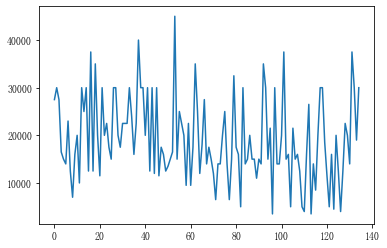

In [181]:
df['salary'].plot() #默认折线图

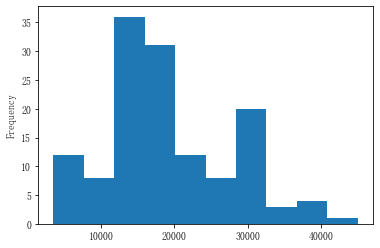

In [182]:
df['salary'].plot(kind='hist')

# 33.数据可视化
绘制薪资水平密度曲线

C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


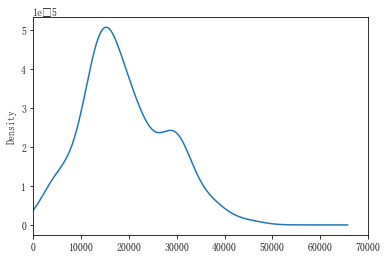

In [184]:
df['salary'].plot(kind='kde',xlim=(0,70000)) #x轴范围为0到70000

# 34.数据删除
删除最后一列categories

In [237]:
df

,createTime,education,salary,categories
0,03-16,本科,27500,高
1,03-16,本科,30000,高
2,03-16,不限,27500,高
3,03-16,本科,16500,中
4,03-16,本科,15000,中
...,...,...,...,...
130,03-16,本科,14000,中
131,03-16,硕士,37500,高
132,03-16,本科,30000,高
133,03-16,本科,19000,中


In [238]:
del df['categories']

In [239]:
df

,createTime,education,salary
0,03-16,本科,27500
1,03-16,本科,30000
2,03-16,不限,27500
3,03-16,本科,16500
4,03-16,本科,15000
...,...,...,...
130,03-16,本科,14000
131,03-16,硕士,37500
132,03-16,本科,30000
133,03-16,本科,19000


# 35.数据处理
将df的第一列与第二列合并为新的一列

In [285]:
df['test']=df['createTime']+df['education']
df

,createTime,education,salary,test
0,03-16,本科,27500.0,03-16本科
1,03-16,本科,30000.0,03-16本科
2,03-16,不限,27500.0,03-16不限
3,03-16,本科,16500.0,03-16本科
4,03-16,本科,15000.0,03-16本科
...,...,...,...,...
130,03-16,本科,14000.0,03-16本科
131,03-16,硕士,37500.0,03-16硕士
132,03-16,本科,30000.0,03-16本科
133,03-16,本科,19000.0,03-16本科


# 36.数据处理
将education列与salary列合并为新的一列

In [286]:
# 必须先把salary列转为字符串类型
df.dtypes
# df['education']+str(df['salary']) #不合适
type(df['salary'].map(str).iloc[0]) #映射
df['test1']=df['education']+df['salary'].map(str)
df

,createTime,education,salary,test,test1
0,03-16,本科,27500.0,03-16本科,本科27500.0
1,03-16,本科,30000.0,03-16本科,本科30000.0
2,03-16,不限,27500.0,03-16不限,不限27500.0
3,03-16,本科,16500.0,03-16本科,本科16500.0
4,03-16,本科,15000.0,03-16本科,本科15000.0
...,...,...,...,...,...
130,03-16,本科,14000.0,03-16本科,本科14000.0
131,03-16,硕士,37500.0,03-16硕士,硕士37500.0
132,03-16,本科,30000.0,03-16本科,本科30000.0
133,03-16,本科,19000.0,03-16本科,本科19000.0


# 37.数据计算
计算salary最大值与最小值的差

In [204]:
df['salary'].max()-df['salary'].min()

df[['salary']].apply(lambda x:x.max()-x.min()) #注意加[]，apply用在dataFrame,map用在Series
df[['salary']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   salary  135 non-null    float64
dtypes: float64(1)
memory usage: 1.2 KB


# 38.数据处理
将第一行与最后一行拼接

In [214]:
# 17.数据修改添加一行数据['Perl',6.6]
pd.concat((df.iloc[0],df.iloc[-1])) #Series
pd.concat((df[:1],df[-1:])) #DataFrame
df[:5] #取前5行=df.iloc[:5]
df[5:] #取第5行之后的所有行=df.iloc[5:]

,createTime,education,salary,test,test1
5,03-16,本科,14000.0,本科14000.0,本科14000.0
6,03-16,硕士,23000.0,硕士23000.0,硕士23000.0
7,03-16,本科,12500.0,本科12500.0,本科12500.0
8,03-16,不限,7000.0,不限7000.0,不限7000.0
9,03-16,本科,16000.0,本科16000.0,本科16000.0
...,...,...,...,...,...
130,03-16,本科,14000.0,本科14000.0,本科14000.0
131,03-16,硕士,37500.0,硕士37500.0,硕士37500.0
132,03-16,本科,30000.0,本科30000.0,本科30000.0
133,03-16,本科,19000.0,本科19000.0,本科19000.0


# 39.数据处理
将第8行数据添加至末尾

In [215]:
df.append(df.iloc[7])

,createTime,education,salary,test,test1
0,03-16,本科,27500.0,本科27500.0,本科27500.0
1,03-16,本科,30000.0,本科30000.0,本科30000.0
2,03-16,不限,27500.0,不限27500.0,不限27500.0
3,03-16,本科,16500.0,本科16500.0,本科16500.0
4,03-16,本科,15000.0,本科15000.0,本科15000.0
...,...,...,...,...,...
131,03-16,硕士,37500.0,硕士37500.0,硕士37500.0
132,03-16,本科,30000.0,本科30000.0,本科30000.0
133,03-16,本科,19000.0,本科19000.0,本科19000.0
134,03-16,本科,30000.0,本科30000.0,本科30000.0


# 40.查看每列的数据类型

In [287]:
df.dtypes
df['salary'].dtypes
df['salary'].dtype

dtype('float64')

# 41.数据处理
将createTime列设置为索引

In [219]:
df.set_index('createTime') #加inplace=True才能真正改变

,education,salary,test,test1
createTime,,,,
03-16,本科,27500.0,本科27500.0,本科27500.0
03-16,本科,30000.0,本科30000.0,本科30000.0
03-16,不限,27500.0,不限27500.0,不限27500.0
03-16,本科,16500.0,本科16500.0,本科16500.0
03-16,本科,15000.0,本科15000.0,本科15000.0
...,...,...,...,...
03-16,本科,14000.0,本科14000.0,本科14000.0
03-16,硕士,37500.0,硕士37500.0,硕士37500.0
03-16,本科,30000.0,本科30000.0,本科30000.0


# 42.数据创建
生成一个和df长度相同的随机数dataframe

In [288]:
pd.Series(np.random.randint(1,10,135)) #135个1到10的随机数
df3=pd.DataFrame(pd.Series(np.random.randint(1,10,135)))
df3

,0
0,3
1,7
2,8
3,6
4,5
...,...
130,1
131,3
132,2
133,4


# 43.数据处理
将上一题生成的dataframe与df合并

In [289]:
df=pd.concat((df,df3),axis=1)
df

,createTime,education,salary,test,test1,0
0,03-16,本科,27500.0,03-16本科,本科27500.0,3
1,03-16,本科,30000.0,03-16本科,本科30000.0,7
2,03-16,不限,27500.0,03-16不限,不限27500.0,8
3,03-16,本科,16500.0,03-16本科,本科16500.0,6
4,03-16,本科,15000.0,03-16本科,本科15000.0,5
...,...,...,...,...,...,...
130,03-16,本科,14000.0,03-16本科,本科14000.0,1
131,03-16,硕士,37500.0,03-16硕士,硕士37500.0,3
132,03-16,本科,30000.0,03-16本科,本科30000.0,2
133,03-16,本科,19000.0,03-16本科,本科19000.0,4


# 44.数据计算
生成新的一列new为salary列减去之前生成随机数列

In [290]:
df['new']=df['salary']-df[0] #0不用加''
df.columns #Index(['createTime', 'education', 'salary', 'test', 'test1', 0, 'new'], dtype='object')
# df

Index(['createTime', 'education', 'salary', 'test', 'test1', 0, 'new'], dtype='object')

# 45.缺失值处理
检查数据中是否含有任何缺失值

In [257]:
df.isnull()
df.isnull().values
df.isnull().values.any() #只要有一个缺失值就返回True
df.isnull().values.all() #只有全是缺失值才返回True

False

# 46.数据转换
将salary列类型转换为浮点数

In [291]:
df['salary'] #Name: salary, Length: 135, dtype: float64
# df['salary'].astype('float') #Name: salary, Length: 135, dtype: float64
# df['salary'].astype('float32') #Name: salary, Length: 135, dtype: float32

0      27500.0
1      30000.0
2      27500.0
3      16500.0
4      15000.0
        ...   
130    14000.0
131    37500.0
132    30000.0
133    19000.0
134    30000.0
Name: salary, Length: 135, dtype: float64

# 47.数据计算
计算salary大于10000的次数

In [274]:
# 方法1，获取True，False的数
df['salary']>10000 #Name: salary, Length: 135, dtype: bool
(df['salary']>10000).value_counts() #True     119  False     16  Name: salary, dtype: int64

# 方法2，获取DataFrame记录数
df[(df['salary']>10000)]
len(df[(df['salary']>10000)])

119

# 48.数据统计
查看每种学历出现的次数

In [276]:
df['education'].value_counts()

本科    119
硕士      7
不限      5
大专      4
Name: education, dtype: int64

# 49.数据查看
查看education共有几种学历

In [279]:
df['education'].unique()

array(['本科', '不限', '硕士', '大专'], dtype=object)

# 50.数据提取
提取salary列与new列的和大于60000的最后3行

In [297]:
# 和的两种计算方式
# 方法1，直接加和
df['salary']+df['new']

# 方法2，函数映射
df1=df[['salary','new']]
rowsums=df1.apply(np.sum,axis=1)
# rowsums
df[(df['salary']+df['new'])>60000]
df[(df['salary']+df['new'])>60000].tail(3)
df[(df['salary']+df['new'])>60000][::-1][:3] #::为间隔步数，-1表示倒数，3表示3个

,createTime,education,salary,test,test1,0,new
131,03-16,硕士,37500.0,03-16硕士,硕士37500.0,3,37497.0
101,03-16,本科,37500.0,03-16本科,本科37500.0,1,37499.0
92,03-16,本科,35000.0,03-16本科,本科35000.0,6,34994.0


In [305]:
df1=df[['salary','new']]
rowsums=df1.apply(np.sum,axis=1)
np.where(rowsums>60000) #返回元组
np.where(rowsums>60000)[0]
np.where(rowsums>60000)[0][-3:]
df.iloc[np.where(rowsums>60000)[0][-3:]]

,createTime,education,salary,test,test1,0,new
92,03-16,本科,35000.0,03-16本科,本科35000.0,6,34994.0
101,03-16,本科,37500.0,03-16本科,本科37500.0,1,37499.0
131,03-16,硕士,37500.0,03-16硕士,硕士37500.0,3,37497.0
